# Heart Failure Prediction Dataset
##### Activity performed for the discipline "Data Mining"
##### [Matheus Pimenta](https://github.com/omatheuspimenta)
### Accessed in Oct. 2021 
### Available in [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction)
## Description
### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations
Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

### For more information visit the Kaggle site.

## Importing the libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset using Pandas API

In [62]:
df = pd.read_csv('heart.csv')

## Getting some information about the dataset

In [70]:
print("Dataset shape:{}\nThere are {} rows and {} columns.".format(df.shape, df.shape[0], df.shape[1]))
df.head(3)

Dataset shape:(918, 12)
There are 918 rows and 12 columns.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000,Up,0


There are 918 rows and 12 columns, that is, 918 samples and 11 features + 1 output label, in this case, the column "HeartDisease" represents if the sample has heart diseases.

## According the [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction) description
### Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [71]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Getting the mean, standard deviation, mode and, variance for all continuous values.

In [41]:
pd.options.display.float_format = "{:.3f}".format
print("Describe:\n",df.describe().T)
print("Variance:\n",df.var().T)
print("Mode:\n",df.mode().T)

Describe:
                count    mean     std    min     25%     50%     75%     max
Age          918.000  53.511   9.433 28.000  47.000  54.000  60.000  77.000
RestingBP    918.000 132.397  18.514  0.000 120.000 130.000 140.000 200.000
Cholesterol  918.000 198.800 109.384  0.000 173.250 223.000 267.000 603.000
FastingBS    918.000   0.233   0.423  0.000   0.000   0.000   0.000   1.000
MaxHR        918.000 136.809  25.460 60.000 120.000 138.000 156.000 202.000
Oldpeak      918.000   0.887   1.067 -2.600   0.000   0.600   1.500   6.200
HeartDisease 918.000   0.553   0.497  0.000   0.000   1.000   1.000   1.000
Variance:
 Age               88.974
RestingBP        342.774
Cholesterol    11964.891
FastingBS          0.179
MaxHR            648.229
Oldpeak            1.138
HeartDisease       0.247
dtype: float64
Mode:
                      0
Age                 54
Sex                  M
ChestPainType      ASY
RestingBP          120
Cholesterol          0
FastingBS            0
RestingECG  

## Boxplot for the column "Oldpeak"

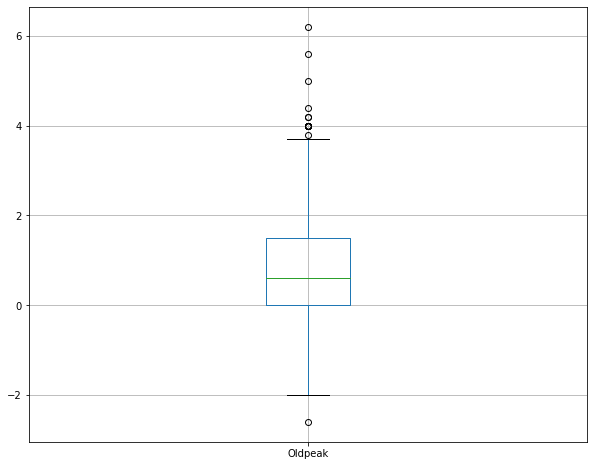

In [73]:
boxplot = df.boxplot(column=['Oldpeak'], figsize=(10,8))

Analyzing the boxplot the median is 0.6 and the quartiles are  0.0, 0.6 and 1.5

## There are some categorical columns

In [79]:
df.select_dtypes(include=['object']).head(1)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up


In [83]:
df.select_dtypes(include=['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## Creating barplots for the categorical columns

<ipython-input-86-fd79d2b79513>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


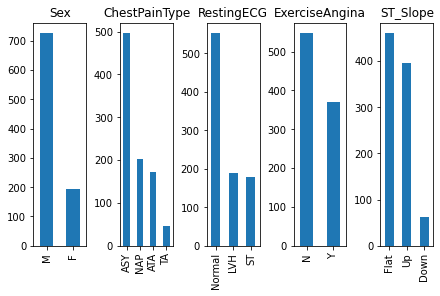

In [86]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, ax = plt.subplots(1, len(categorical_features), constrained_layout=True)
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

## Replacing the categorical values

In [87]:
categorical_replace = {"ChestPainType": {"TA": 1, "ATA": 2, "NAP": 3, "ASY": 4},
                       "ST_Slope":      {"Up": 1, "Flat": 2, "Down": 3},
                       "RestingECG":    {"Normal": 1, "ST": 2, "LVH": 3}}

In [88]:
df["Sex"] = np.where(df["Sex"].str.contains("M"), 1, 0)
df["ExerciseAngina"] = np.where(df["ExerciseAngina"].str.contains("Y"),1,0)
df = df.replace(categorical_replace)

To create the histograms needs to set categorical in an integer value. The appearance is the same as the above bar plots.